# Bank Customer Churn Rate Prediction
This notebook does end-to-end customer churn rate prediction using Artifacial Neural Networks (Deep Learning). 

## 1. Problem Definintion:
Taking customer's data as input, we have to tell that whether customer will quit from the bank or not.
  
## 2. Data:  
Data comes from a toy data set, but its really close to original one.  
Csv file of dataset can be found in same folder.
  
## 3. Evaluation:  
Model is evaluated by accuracy, and cross validation score.

## 4. Features:
Data Contains many features about the customer that can contribute towards its exit/not exit.  
  
Following are the important features.  
  
1. CreditScore  
2. Geography
3. Gender 
4. Age
5. Tenure 
6. Balance 
7. NumOfProducts 
8. HasCrCard
9. IsActiveMember 
10. EstimatedSalary

### Getting the Tools ready

In [51]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [1]:
#deep learning packages
import tensorflow as tf
#regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Getting Data Ready:

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data preprocessing:

In [4]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

### Dealing with categorical values:

In [5]:
def preprocessing(df):
    """
    Do label encoding and imputation.
    """
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label]=content.astype('category').cat.as_ordered()
            df[label]=pd.Categorical(content).codes
    

In [6]:
preprocessing(X)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), int8(2)
memory usage: 644.7 KB


In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


### Checking Missing Values:

In [9]:
X.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
dtype: bool

### Splitting into train,test set

In [10]:
X=X.values
y=y.values

In [11]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              random_state=22,
                                              test_size=0.2)

### Feature Scalling

In [13]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [14]:
len(X_test)

2000

## 5. Modelling:
Our data is preprocessed, now it's the time to do modeling.

In [54]:
#importing modeling,avaluation and tunning packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix

In [58]:
def model_building():
    # initializing the model
    ANN_clf=Sequential()

    # creating the input layer and first hidden layer
    ANN_clf.add(Dense(input_dim=10,output_dim=6,init="uniform",activation="relu"))

    #creating the second hidden layer

    ANN_clf.add(Dense(units=6,init="uniform",activation="relu"))

    #creating the output layer

    ANN_clf.add(Dense(units=1,init="uniform",activation="sigmoid"))

    #compiling the model
    ANN_clf.compile(optimizer=keras.optimizers.Adam(),
                loss="binary_crossentropy",
               metrics=["accuracy"])
    ANN_clf.build()
    return ANN_clf

In [26]:
#building model
model=model_building()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", units=6, kernel_initializer="uniform")`
  
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


In [28]:
#fitting model
model.fit(x=X_train,
          y=y_train,
          nb_epoch=100,
         batch_size=30)

/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/10
8000/8000 [==============================] - 2s 214us/step - loss: 0.4805 - accuracy: 0.7944
Epoch 2/10
8000/8000 [==============================] - 1s 178us/step - loss: 0.4297 - accuracy: 0.7949
Epoch 3/10
8000/8000 [==============================] - 1s 185us/step - loss: 0.4232 - accuracy: 0.8054
Epoch 4/10
8000/8000 [==============================] - 1s 182us/step - loss: 0.4190 - accuracy: 0.8260
Epoch 5/10
8000/8000 [==============================] - 2s 190us/step - loss: 0.4172 - accuracy: 0.8278
Epoch 6/10
8000/8000 [==============================] - 1s 184us/step - loss: 0.4154 - accuracy: 0.8316
Epoch 7/10
8000/8000 [==============================] - 2s 188us/step - loss: 0.4139 - accuracy: 0.8332
Epoch 8/10
8000/8000 [==============================] - 2s 192us/step - loss: 0.4126 - accuracy: 0.8330
Epoch 9/10
8000/8000 [==============================] - 2s 194us/step - loss: 0.4114 - accuracy: 0.8339
Epoch 10/10
8000/8000 [==============================] - 1s 186u

### 6. Evaluating the model 

In [29]:
##evaluating the model with k-folds
classifier=KerasClassifier(build_fn=model_building,nb_epoch=100,batch_size=10)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,n_jobs=-1,cv=10)

In [33]:
accuracies

array([0.77999997, 0.80874997, 0.79374999, 0.80124998, 0.815     ,
       0.79500002, 0.78500003, 0.81375003, 0.78500003, 0.78125   ])

In [45]:
cross_val_accuracy=np.mean(accuracies)
cross_val_accuracy

0.7958750009536744

In [46]:
varience=np.var(cross_val_accuracy)
varience

0.0

In [36]:
y_preds=model.predict(X_test)
y_preds

array([[0.19479993],
       [0.6378256 ],
       [0.12736475],
       ...,
       [0.18184319],
       [0.03297982],
       [0.11088231]], dtype=float32)

In [37]:
y_preds=(y_preds > 0.5)
y_preds

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [50]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 26us/step


[0.4164354522228241, 0.8370000123977661]

#### Visualizing Model Confusions

In [41]:
cm=confusion_matrix(y_test,y_preds)

In [42]:
cm

array([[1567,   37],
       [ 289,  107]])

In [43]:
import seaborn as sns

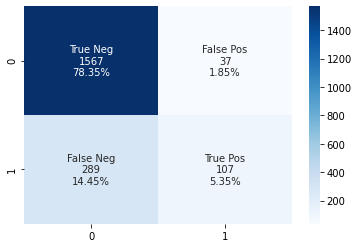

In [44]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues');



### 7. Tunning Our Model

In [63]:
params_grid={
    'batch_size':[20,32],
    'epochs':[250,500]
    }

classifier=KerasClassifier(build_fn=model_building)
grid_model=GridSearchCV(estimator=classifier,
                       param_grid=params_grid,
                       cv=5)
grid_model.fit(X_train,y_train)

/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", units=6, kernel_initializer="uniform")`
  
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  


Epoch 1/150
6400/6400 [==============================] - 1s 134us/step - loss: 0.5645 - accuracy: 0.7950
Epoch 2/150
6400/6400 [==============================] - 1s 101us/step - loss: 0.4373 - accuracy: 0.7950
Epoch 3/150
6400/6400 [==============================] - 1s 104us/step - loss: 0.4290 - accuracy: 0.8102
Epoch 4/150
6400/6400 [==============================] - 1s 114us/step - loss: 0.4242 - accuracy: 0.8236
Epoch 5/150
6400/6400 [==============================] - 1s 102us/step - loss: 0.4200 - accuracy: 0.8278
Epoch 6/150
6400/6400 [==============================] - 1s 99us/step - loss: 0.4168 - accuracy: 0.8333
Epoch 7/150
6400/6400 [==============================] - 1s 101us/step - loss: 0.4145 - accuracy: 0.8320
Epoch 8/150
6400/6400 [==============================] - 1s 100us/step - loss: 0.4123 - accuracy: 0.8342
Epoch 9/150
6400/6400 [==============================] - 1s 105us/step - loss: 0.4106 - accuracy: 0.8320
Epoch 10/150
6400/6400 [==============================] 

6400/6400 [==============================] - 1s 92us/step - loss: 0.3962 - accuracy: 0.8350
Epoch 79/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3955 - accuracy: 0.8352
Epoch 80/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.3960 - accuracy: 0.8358
Epoch 81/150
6400/6400 [==============================] - 1s 92us/step - loss: 0.3957 - accuracy: 0.8363
Epoch 82/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3956 - accuracy: 0.8361
Epoch 83/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3954 - accuracy: 0.8364
Epoch 84/150
6400/6400 [==============================] - 1s 98us/step - loss: 0.3959 - accuracy: 0.8386
Epoch 85/150
6400/6400 [==============================] - 1s 97us/step - loss: 0.3950 - accuracy: 0.8359
Epoch 86/150
6400/6400 [==============================] - 1s 99us/step - loss: 0.3947 - accuracy: 0.8361
Epoch 87/150
6400/6400 [==============================] - 1s 95us/st

6400/6400 [==============================] - 1s 95us/step - loss: 0.4321 - accuracy: 0.7942
Epoch 5/150
6400/6400 [==============================] - 1s 91us/step - loss: 0.4289 - accuracy: 0.7942
Epoch 6/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.4252 - accuracy: 0.8016
Epoch 7/150
6400/6400 [==============================] - 1s 91us/step - loss: 0.4224 - accuracy: 0.8158
Epoch 8/150
6400/6400 [==============================] - 1s 96us/step - loss: 0.4205 - accuracy: 0.8194
Epoch 9/150
6400/6400 [==============================] - 1s 99us/step - loss: 0.4189 - accuracy: 0.8238
Epoch 10/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.4174 - accuracy: 0.8278
Epoch 11/150
6400/6400 [==============================] - 1s 92us/step - loss: 0.4159 - accuracy: 0.8267
Epoch 12/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.4146 - accuracy: 0.8272
Epoch 13/150
6400/6400 [==============================] - 1s 94us/step - 

6400/6400 [==============================] - 1s 96us/step - loss: 0.3984 - accuracy: 0.8358
Epoch 83/150
6400/6400 [==============================] - 1s 96us/step - loss: 0.3985 - accuracy: 0.8378
Epoch 84/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3984 - accuracy: 0.8364
Epoch 85/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3985 - accuracy: 0.8361
Epoch 86/150
6400/6400 [==============================] - 1s 97us/step - loss: 0.3983 - accuracy: 0.8364
Epoch 87/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3982 - accuracy: 0.8369
Epoch 88/150
6400/6400 [==============================] - 1s 97us/step - loss: 0.3983 - accuracy: 0.8366
Epoch 89/150
6400/6400 [==============================] - 1s 98us/step - loss: 0.3983 - accuracy: 0.8372
Epoch 90/150
6400/6400 [==============================] - 1s 91us/step - loss: 0.3983 - accuracy: 0.8341
Epoch 91/150
6400/6400 [==============================] - 1s 93us/st

6400/6400 [==============================] - 1s 97us/step - loss: 0.4205 - accuracy: 0.8261
Epoch 10/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.4193 - accuracy: 0.8277
Epoch 11/150
6400/6400 [==============================] - 1s 91us/step - loss: 0.4176 - accuracy: 0.8294
Epoch 12/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.4163 - accuracy: 0.8305
Epoch 13/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.4152 - accuracy: 0.8313
Epoch 14/150
6400/6400 [==============================] - 1s 97us/step - loss: 0.4141 - accuracy: 0.8320
Epoch 15/150
6400/6400 [==============================] - 1s 96us/step - loss: 0.4135 - accuracy: 0.8325
Epoch 16/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.4127 - accuracy: 0.8330
Epoch 17/150
6400/6400 [==============================] - 1s 92us/step - loss: 0.4120 - accuracy: 0.8327
Epoch 18/150
6400/6400 [==============================] - 1s 94us/st

6400/6400 [==============================] - 1s 98us/step - loss: 0.3949 - accuracy: 0.8367
Epoch 88/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3953 - accuracy: 0.8375
Epoch 89/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3945 - accuracy: 0.8381
Epoch 90/150
6400/6400 [==============================] - 1s 96us/step - loss: 0.3946 - accuracy: 0.8380
Epoch 91/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3949 - accuracy: 0.8369
Epoch 92/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3947 - accuracy: 0.8388
Epoch 93/150
6400/6400 [==============================] - 1s 91us/step - loss: 0.3941 - accuracy: 0.8400
Epoch 94/150
6400/6400 [==============================] - 1s 96us/step - loss: 0.3948 - accuracy: 0.8391
Epoch 95/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3946 - accuracy: 0.8378
Epoch 96/150
6400/6400 [==============================] - 1s 97us/st

Epoch 14/150
6400/6400 [==============================] - 1s 107us/step - loss: 0.4011 - accuracy: 0.8397
Epoch 15/150
6400/6400 [==============================] - 1s 103us/step - loss: 0.3999 - accuracy: 0.8395
Epoch 16/150
6400/6400 [==============================] - 1s 100us/step - loss: 0.3988 - accuracy: 0.8391
Epoch 17/150
6400/6400 [==============================] - 1s 101us/step - loss: 0.3979 - accuracy: 0.8400
Epoch 18/150
6400/6400 [==============================] - 1s 101us/step - loss: 0.3974 - accuracy: 0.8388
Epoch 19/150
6400/6400 [==============================] - 1s 102us/step - loss: 0.3966 - accuracy: 0.8378
Epoch 20/150
6400/6400 [==============================] - 1s 97us/step - loss: 0.3958 - accuracy: 0.8389
Epoch 21/150
6400/6400 [==============================] - 1s 100us/step - loss: 0.3951 - accuracy: 0.8394
Epoch 22/150
6400/6400 [==============================] - 1s 103us/step - loss: 0.3939 - accuracy: 0.8389
Epoch 23/150
6400/6400 [=======================

6400/6400 [==============================] - 1s 92us/step - loss: 0.3860 - accuracy: 0.8439
Epoch 92/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3865 - accuracy: 0.8433
Epoch 93/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.3857 - accuracy: 0.8428
Epoch 94/150
6400/6400 [==============================] - 1s 91us/step - loss: 0.3861 - accuracy: 0.8436
Epoch 95/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3859 - accuracy: 0.8409
Epoch 96/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.3862 - accuracy: 0.8423
Epoch 97/150
6400/6400 [==============================] - 1s 97us/step - loss: 0.3858 - accuracy: 0.8444
Epoch 98/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.3861 - accuracy: 0.8430
Epoch 99/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.3855 - accuracy: 0.8427
Epoch 100/150
6400/6400 [==============================] - 1s 95us/s

6400/6400 [==============================] - 1s 99us/step - loss: 0.5034 - accuracy: 0.7978
Epoch 18/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 19/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.5034 - accuracy: 0.7978
Epoch 20/150
6400/6400 [==============================] - 1s 100us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 21/150
6400/6400 [==============================] - 1s 98us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 22/150
6400/6400 [==============================] - 1s 102us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 23/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 24/150
6400/6400 [==============================] - 1s 94us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 25/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 26/150
6400/6400 [==============================] - 1s 100us

6400/6400 [==============================] - 1s 93us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 96/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 97/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 98/150
6400/6400 [==============================] - 1s 93us/step - loss: 0.5034 - accuracy: 0.7978
Epoch 99/150
6400/6400 [==============================] - 1s 92us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 100/150
6400/6400 [==============================] - 1s 92us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 101/150
6400/6400 [==============================] - 1s 89us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 102/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 103/150
6400/6400 [==============================] - 1s 95us/step - loss: 0.5035 - accuracy: 0.7978
Epoch 104/150
6400/6400 [==============================] - 1s 90

6400/6400 [==============================] - 0s 75us/step - loss: 0.3623 - accuracy: 0.8491
Epoch 23/150
6400/6400 [==============================] - 0s 60us/step - loss: 0.3598 - accuracy: 0.8519
Epoch 24/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3582 - accuracy: 0.8528
Epoch 25/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3574 - accuracy: 0.8545
Epoch 26/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3555 - accuracy: 0.8555
Epoch 27/150
6400/6400 [==============================] - 0s 60us/step - loss: 0.3550 - accuracy: 0.8536
Epoch 28/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3537 - accuracy: 0.8553
Epoch 29/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3535 - accuracy: 0.8583
Epoch 30/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3521 - accuracy: 0.8589
Epoch 31/150
6400/6400 [==============================] - 0s 55us/st

6400/6400 [==============================] - 0s 57us/step - loss: 0.3390 - accuracy: 0.8589
Epoch 101/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3378 - accuracy: 0.8627
Epoch 102/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3382 - accuracy: 0.8606
Epoch 103/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3383 - accuracy: 0.8602
Epoch 104/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3380 - accuracy: 0.8584
Epoch 105/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3384 - accuracy: 0.8625
Epoch 106/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3377 - accuracy: 0.8598
Epoch 107/150
6400/6400 [==============================] - 0s 60us/step - loss: 0.3379 - accuracy: 0.8598
Epoch 108/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3381 - accuracy: 0.8631
Epoch 109/150
6400/6400 [==============================] - 0

6400/6400 [==============================] - 0s 67us/step - loss: 0.4072 - accuracy: 0.8338
Epoch 28/150
6400/6400 [==============================] - 0s 66us/step - loss: 0.4070 - accuracy: 0.8334
Epoch 29/150
6400/6400 [==============================] - 0s 64us/step - loss: 0.4066 - accuracy: 0.8350
Epoch 30/150
6400/6400 [==============================] - 0s 63us/step - loss: 0.4067 - accuracy: 0.8336
Epoch 31/150
6400/6400 [==============================] - 0s 55us/step - loss: 0.4063 - accuracy: 0.8341
Epoch 32/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.4059 - accuracy: 0.8348
Epoch 33/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.4054 - accuracy: 0.8350
Epoch 34/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.4053 - accuracy: 0.8356
Epoch 35/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.4049 - accuracy: 0.8348
Epoch 36/150
6400/6400 [==============================] - 0s 57us/st

6400/6400 [==============================] - 0s 57us/step - loss: 0.3938 - accuracy: 0.8367
Epoch 106/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3937 - accuracy: 0.8363
Epoch 107/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3940 - accuracy: 0.8361
Epoch 108/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3935 - accuracy: 0.8367
Epoch 109/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3936 - accuracy: 0.8378
Epoch 110/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3937 - accuracy: 0.8372
Epoch 111/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3935 - accuracy: 0.8389
Epoch 112/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3931 - accuracy: 0.8386
Epoch 113/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3932 - accuracy: 0.8372
Epoch 114/150
6400/6400 [==============================] - 0

6400/6400 [==============================] - 0s 59us/step - loss: 0.4083 - accuracy: 0.8361
Epoch 33/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.4080 - accuracy: 0.8359
Epoch 34/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.4077 - accuracy: 0.8352
Epoch 35/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.4073 - accuracy: 0.8369
Epoch 36/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.4070 - accuracy: 0.8339
Epoch 37/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.4066 - accuracy: 0.8344
Epoch 38/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.4065 - accuracy: 0.8366
Epoch 39/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.4064 - accuracy: 0.8364
Epoch 40/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.4061 - accuracy: 0.8364
Epoch 41/150
6400/6400 [==============================] - 0s 57us/st

6400/6400 [==============================] - 0s 57us/step - loss: 0.3981 - accuracy: 0.8386
Epoch 111/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3980 - accuracy: 0.8392
Epoch 112/150
6400/6400 [==============================] - 0s 55us/step - loss: 0.3980 - accuracy: 0.8384
Epoch 113/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3982 - accuracy: 0.8378
Epoch 114/150
6400/6400 [==============================] - 0s 56us/step - loss: 0.3978 - accuracy: 0.8378
Epoch 115/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3982 - accuracy: 0.8370
Epoch 116/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3978 - accuracy: 0.8386
Epoch 117/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3979 - accuracy: 0.8384
Epoch 118/150
6400/6400 [==============================] - 0s 60us/step - loss: 0.3980 - accuracy: 0.8383
Epoch 119/150
6400/6400 [==============================] - 0

6400/6400 [==============================] - 0s 58us/step - loss: 0.4002 - accuracy: 0.8375
Epoch 38/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.4002 - accuracy: 0.8378
Epoch 39/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3997 - accuracy: 0.8375
Epoch 40/150
6400/6400 [==============================] - 0s 62us/step - loss: 0.3997 - accuracy: 0.8370
Epoch 41/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3988 - accuracy: 0.8397
Epoch 42/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3983 - accuracy: 0.8391
Epoch 43/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3981 - accuracy: 0.8386
Epoch 44/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3982 - accuracy: 0.8383
Epoch 45/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3976 - accuracy: 0.8388
Epoch 46/150
6400/6400 [==============================] - 0s 59us/st

6400/6400 [==============================] - 0s 58us/step - loss: 0.3925 - accuracy: 0.8378
Epoch 116/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3918 - accuracy: 0.8383
Epoch 117/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3926 - accuracy: 0.8380
Epoch 118/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3922 - accuracy: 0.8394
Epoch 119/150
6400/6400 [==============================] - 0s 60us/step - loss: 0.3922 - accuracy: 0.8367
Epoch 120/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3926 - accuracy: 0.8406
Epoch 121/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3922 - accuracy: 0.8397
Epoch 122/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3922 - accuracy: 0.8384
Epoch 123/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3922 - accuracy: 0.8383
Epoch 124/150
6400/6400 [==============================] - 0

6400/6400 [==============================] - 0s 56us/step - loss: 0.3991 - accuracy: 0.8359
Epoch 43/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3988 - accuracy: 0.8361
Epoch 44/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3986 - accuracy: 0.8355
Epoch 45/150
6400/6400 [==============================] - 0s 61us/step - loss: 0.3985 - accuracy: 0.8366
Epoch 46/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3982 - accuracy: 0.8369
Epoch 47/150
6400/6400 [==============================] - 0s 56us/step - loss: 0.3980 - accuracy: 0.8358
Epoch 48/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3975 - accuracy: 0.8355
Epoch 49/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3983 - accuracy: 0.8342
Epoch 50/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3977 - accuracy: 0.8369
Epoch 51/150
6400/6400 [==============================] - 0s 58us/st

Epoch 120/150
6400/6400 [==============================] - 0s 56us/step - loss: 0.3929 - accuracy: 0.8367
Epoch 121/150
6400/6400 [==============================] - 0s 55us/step - loss: 0.3929 - accuracy: 0.8356
Epoch 122/150
6400/6400 [==============================] - 0s 59us/step - loss: 0.3931 - accuracy: 0.8383
Epoch 123/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3928 - accuracy: 0.8398
Epoch 124/150
6400/6400 [==============================] - 0s 58us/step - loss: 0.3927 - accuracy: 0.8381
Epoch 125/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3926 - accuracy: 0.8356
Epoch 126/150
6400/6400 [==============================] - 0s 54us/step - loss: 0.3928 - accuracy: 0.8373
Epoch 127/150
6400/6400 [==============================] - 0s 57us/step - loss: 0.3927 - accuracy: 0.8388
Epoch 128/150
6400/6400 [==============================] - 0s 56us/step - loss: 0.3927 - accuracy: 0.8363
Epoch 129/150
6400/6400 [=====================

8000/8000 [==============================] - 0s 57us/step - loss: 0.3919 - accuracy: 0.8389
Epoch 48/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.3921 - accuracy: 0.8375
Epoch 49/150
8000/8000 [==============================] - 0s 58us/step - loss: 0.3921 - accuracy: 0.8376
Epoch 50/150
8000/8000 [==============================] - 0s 58us/step - loss: 0.3919 - accuracy: 0.8369
Epoch 51/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.3920 - accuracy: 0.8380
Epoch 52/150
8000/8000 [==============================] - 0s 56us/step - loss: 0.3917 - accuracy: 0.8371
Epoch 53/150
8000/8000 [==============================] - 0s 60us/step - loss: 0.3917 - accuracy: 0.8385
Epoch 54/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.3921 - accuracy: 0.8376
Epoch 55/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.3917 - accuracy: 0.8381
Epoch 56/150
8000/8000 [==============================] - 0s 56us/st

8000/8000 [==============================] - 0s 57us/step - loss: 0.3903 - accuracy: 0.8380
Epoch 125/150
8000/8000 [==============================] - 0s 59us/step - loss: 0.3904 - accuracy: 0.8391
Epoch 126/150
8000/8000 [==============================] - 0s 54us/step - loss: 0.3908 - accuracy: 0.8388
Epoch 127/150
8000/8000 [==============================] - 0s 56us/step - loss: 0.3903 - accuracy: 0.8393
Epoch 128/150
8000/8000 [==============================] - 0s 59us/step - loss: 0.3905 - accuracy: 0.8385
Epoch 129/150
8000/8000 [==============================] - 0s 56us/step - loss: 0.3905 - accuracy: 0.8399
Epoch 130/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.3903 - accuracy: 0.8393
Epoch 131/150
8000/8000 [==============================] - 0s 55us/step - loss: 0.3904 - accuracy: 0.8384
Epoch 132/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.3904 - accuracy: 0.8385
Epoch 133/150
8000/8000 [==============================] - 0

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f7260c00cd0>,
             param_grid={'batch_size': [20, 32], 'epochs': [150]})

In [64]:
grid_model.best_params_

{'batch_size': 32, 'epochs': 150}

In [65]:
grid_model.best_score_

0.8389999985694885

### 8. Training Our Model with the best Parameters Found

In [67]:
model=model_building()
model.fit(X_train,
         y_train,
         nb_epoch=150,
         batch_size=32,)

/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, activation="relu", units=6, kernel_initializer="uniform")`
  
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`
  
/home/hassan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/150
8000/8000 [==============================] - 1s 91us/step - loss: 0.5815 - accuracy: 0.7919
Epoch 2/150
8000/8000 [==============================] - 0s 62us/step - loss: 0.4399 - accuracy: 0.7949
Epoch 3/150
8000/8000 [==============================] - 0s 57us/step - loss: 0.4345 - accuracy: 0.7949
Epoch 4/150
8000/8000 [==============================] - 0s 61us/step - loss: 0.4325 - accuracy: 0.7949
Epoch 5/150
8000/8000 [==============================] - 0s 60us/step - loss: 0.4309 - accuracy: 0.7949
Epoch 6/150
8000/8000 [==============================] - 0s 61us/step - loss: 0.4294 - accuracy: 0.7949
Epoch 7/150
8000/8000 [==============================] - 0s 59us/step - loss: 0.4276 - accuracy: 0.7949
Epoch 8/150
8000/8000 [==============================] - 0s 59us/step - loss: 0.4249 - accuracy: 0.7949
Epoch 9/150
8000/8000 [==============================] - 0s 60us/step - loss: 0.4227 - accuracy: 0.8101
Epoch 10/150
8000/8000 [==============================] - 1s 69u

8000/8000 [==============================] - 0s 61us/step - loss: 0.3971 - accuracy: 0.8366
Epoch 80/150
8000/8000 [==============================] - 1s 64us/step - loss: 0.3970 - accuracy: 0.8372
Epoch 81/150
8000/8000 [==============================] - 0s 60us/step - loss: 0.3969 - accuracy: 0.8379
Epoch 82/150
8000/8000 [==============================] - 0s 61us/step - loss: 0.3970 - accuracy: 0.8376
Epoch 83/150
8000/8000 [==============================] - 1s 63us/step - loss: 0.3965 - accuracy: 0.8356
Epoch 84/150
8000/8000 [==============================] - 0s 60us/step - loss: 0.3973 - accuracy: 0.8369
Epoch 85/150
8000/8000 [==============================] - 0s 61us/step - loss: 0.3965 - accuracy: 0.8371
Epoch 86/150
8000/8000 [==============================] - 0s 62us/step - loss: 0.3965 - accuracy: 0.8364
Epoch 87/150
8000/8000 [==============================] - 0s 59us/step - loss: 0.3966 - accuracy: 0.8371
Epoch 88/150
8000/8000 [==============================] - 0s 61us/st

In [68]:
model.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 40us/step


[0.40778391480445864, 0.8349999785423279]

Ops! Our model is not improved.....  
But we can do more experiments do get high results.

## What we can do more to get high accuracy?  
  
Well, we can :  
1. Change ANN Artitechure.  

2. Do more search for hyperparameters.  

3. Increase data. 
  
and lot more.
  